In [92]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import griddata
from matplotlib import cm

In [93]:
class Dex:
    def get_amount_out_by_amount_in(self, input: float) -> float:
        raise Exception("not implemented")

    def get_relation(self, input: float) -> float:
        return self.get_amount_out_by_amount_in(input) / input

class DexXYK(Dex):
    def __init__(self, x_init, y_init):
        self.x = x_init
        self.y = y_init
        self.k = x_init*y_init

    def get_amount_out_by_amount_in(self, input: float) -> float:
        return self.y - self.k / (self.x + input)

In [94]:
class DexChain(Dex):
    def __init__(self):
        self.chain = list()

    def append(self, dex: Dex):
        self.chain.append(dex)

    def get_amount_out_by_amount_in(self, input: float) -> float:
        out = input
        for dex in self.chain:
            out = dex.get_amount_out_by_amount_in(out)
        return out

    def get_relation(self, input: float) -> float:
        out = input
        res = 1.0
        for dex in self.chain:
            loc_in = out
            out = dex.get_amount_out_by_amount_in(loc_in)
            res = res * out / loc_in
        return res

In [95]:
k1 = 1000
k2 = 500000
k3 = 10000

gx = []
gy = []
gz = []

for x in range(1, 100, 1):
    chain = DexChain()
    chain.append(DexXYK(x, k1/x))
    chain.append(DexXYK(k1/x, k2*x/k1))
    chain.append(DexXYK(k2*x/k1, k3*k1/(k2*x)))

    inputs = list(range(1, 100, 1))
    relation = list()

    for input in inputs:
        relation.append(chain.get_relation(input))

    gx = [*gx, *inputs]
    gy = [*gy, *([x]*len(inputs))]
    gz = [*gz, *relation]

df = pd.DataFrame(data={"x":gx,"y":gy,"z":gz})

In [96]:
def plot_surface(df):
    x1 = np.linspace(df['x'].min(), df['x'].max(), len(df['x'].unique()))
    y1 = np.linspace(df['y'].min(), df['y'].max(), len(df['y'].unique()))
    x2, y2 = np.meshgrid(x1, y1)
    z2 = griddata((df['x'], df['y']), df['z'], (x2, y2), method='cubic')

    _, ax = plt.subplots(subplot_kw=dict(projection="3d"))
    _ = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.coolwarm,
        linewidth=0, antialiased=False)

    ax.view_init(30, 60)
    plt.show()

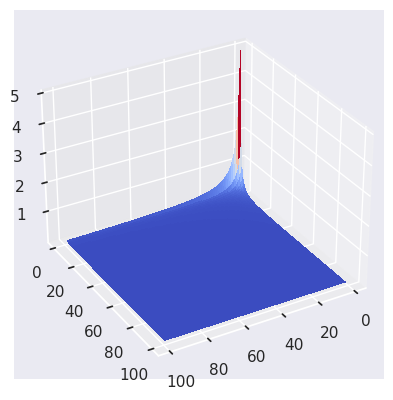

In [97]:
plot_surface(df)

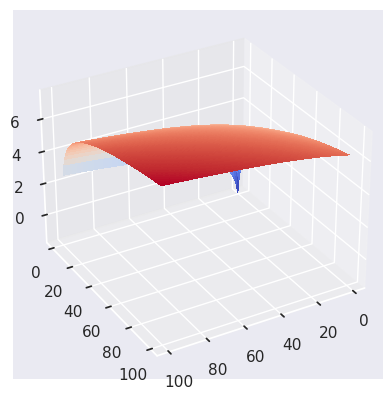

In [98]:
df['z'] = -np.log(df['z'])
plot_surface(df)